In [36]:
import pandas as pd
import numpy as np
from load_data import *
from config import *
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from cal_accuracy import *
import xgboost as xgb
import pickle


In [37]:
# train_path = r'./input/train_features_83_add.xlsx'
# train_path = r'./input/train_features_all.xlsx'
# train_path = r'./input/train_add_20_test.xlsx'
# train_path = r'./input/train_features_100_columns.xlsx'
# train_path = r'./input/final_features_add_test.xlsx'
train_path = r'./input/83_features_100_columns.xlsx'
# train_path = r'./input/yu_83_add_20.xlsx'
# test_path = r'./input/test_features.xlsx'
# test_path = r'./joke/test.xlsx'
# test_path = r'./input/yu_test.xlsx'
test_path = r'./input/test_features_100_columns.xlsx'
train_X, train_y = load_train(train_path, columns=used_feature_columns)
test_X, test_y = load_test(test_path, columns=used_feature_columns)

test_X

,1_mean,2_mean,3_mean,4_mean,5_mean,6_mean,7_mean,8_mean,9_mean,10_mean,...,11_skew,12_skew,13_skew,14_skew,15_skew,16_skew,17_skew,18_skew,19_skew,20_skew
0,-0.293960,-0.207703,0.109251,-0.529573,0.755986,-1.054014,0.703049,-0.673079,-0.171880,0.966240,...,0.475930,-1.462206,-1.454101,0.629865,-2.093479,3.395531,2.353662,2.726185,-0.037135,-0.101252
1,0.041445,-0.250440,0.387113,-0.918239,0.918291,-1.222609,0.149243,-0.937015,0.047104,0.601312,...,1.282694,0.511795,-0.675542,-0.555897,-0.031139,-2.168945,-3.612322,0.788297,-0.176609,1.166683
2,1.277584,-0.698529,0.545414,-0.683205,1.083179,-0.648742,0.857060,-0.580877,0.013835,-0.046866,...,-2.375113,-0.121376,0.339056,-0.518630,-0.864229,0.073792,-0.243164,-0.292726,-0.728616,0.138564
3,0.318395,-0.743700,0.830384,-1.403056,1.350475,-1.033003,1.098990,-0.886661,0.000841,0.371096,...,-1.464747,-0.821993,-1.223060,1.392494,-1.790709,2.007098,-1.301605,1.641509,-1.580497,1.104291
4,0.666272,0.313310,0.090387,0.625706,-0.637895,0.608854,0.251672,0.494243,0.356559,1.108079,...,0.877035,-0.094026,-1.049507,-0.119471,-0.314222,-0.197723,0.156434,0.466410,-1.192626,0.035415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-0.920055,0.584155,0.124088,1.769264,-1.105301,0.687013,-0.472843,-1.206954,-1.158074,-1.388736,...,-0.922594,0.595237,0.301757,-0.529528,0.947888,0.148280,0.750819,0.827918,-0.618435,1.587794
76,-0.045868,0.543684,0.910095,1.617109,-0.607423,0.817127,-0.719405,0.097458,-0.617434,-0.938592,...,0.838574,-0.019324,0.781271,-0.723216,-0.087172,0.464903,-0.325249,-1.065853,-0.316254,0.785929
77,0.056495,-0.221892,-1.284808,2.041660,-0.529522,0.517343,-0.449833,0.845695,-0.497122,1.105447,...,-0.680430,-0.320833,0.911291,-0.530140,-1.602795,0.313154,-0.319529,-0.257430,1.616678,-0.409937
78,-1.326859,1.155633,1.051764,0.831762,0.165159,-0.026400,-1.200996,-1.857734,-0.313646,-0.643758,...,0.820797,-0.627174,0.254380,0.271607,-0.412316,0.079553,-0.931274,0.308360,0.189044,-0.875780


In [38]:
train_X

,1_mean,2_mean,3_mean,4_mean,5_mean,6_mean,7_mean,8_mean,9_mean,10_mean,...,11_skew,12_skew,13_skew,14_skew,15_skew,16_skew,17_skew,18_skew,19_skew,20_skew
0,1.158493,-0.802811,0.841123,-1.154365,0.543898,-0.993626,0.968288,-0.376878,1.064427,1.092830,...,0.911946,-0.893509,0.633365,-0.085422,0.578561,-0.254161,-1.511304,-0.178328,-0.709047,0.823997
1,0.622459,-0.333762,-0.021655,-0.992234,0.459398,-1.778965,-0.777328,-1.081844,0.223471,-0.305364,...,0.191163,0.899048,0.676153,-0.774454,0.204719,-0.587339,-1.357512,-0.085573,-1.699127,0.235568
2,0.114234,0.527876,-0.919093,0.438587,-0.223519,0.589509,0.078222,0.427565,0.457461,0.346663,...,-0.948213,-0.999913,-0.631075,1.395915,2.131723,3.930839,0.044860,0.662295,-1.452602,-0.492251
3,-0.977461,0.756563,-0.133330,1.023387,-1.541148,-0.100056,-0.143618,-1.213242,-1.697990,-1.586009,...,0.442595,0.318683,-2.050677,-0.390891,1.324202,0.237961,0.312387,0.166401,1.740308,2.185845
4,0.750285,-0.209023,0.392005,-1.223411,0.575582,-1.382578,0.180762,-0.943937,-0.231974,-0.175064,...,0.698707,-0.046219,0.322374,-0.190006,-0.385476,0.734401,-0.630808,0.029344,-0.397978,-0.451183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,-0.089411,0.822329,-1.441995,1.237198,-1.026260,1.377931,-1.094621,-0.047325,-1.662067,-1.644796,...,-0.243190,1.243587,0.111367,1.066585,-0.027802,0.185789,-0.702582,0.513334,-0.548216,-1.985498
79,0.596120,-0.498633,0.243787,-1.340728,0.828125,-1.130562,0.514080,-0.352127,0.258978,0.327167,...,-0.076368,1.138378,0.941415,-0.171198,-0.600450,-0.584349,0.939394,1.345593,-0.401042,-0.167309
80,-0.040652,1.019038,-1.413277,0.187209,-1.755475,0.885133,-1.271687,0.418494,-0.247367,-0.447588,...,-1.233043,0.469338,1.072256,-0.628619,0.810956,0.950981,0.733151,-0.504673,-1.133628,0.941128
81,-0.293725,0.809055,-0.261009,0.740396,0.355435,0.625569,0.412686,0.300670,-0.666629,-1.205070,...,1.528473,-0.574770,-0.210878,-0.179883,2.037726,0.309172,-1.621202,1.098616,-0.305813,1.143695


In [39]:
# 1. 支持向量机回归
svr = SVR(kernel='rbf', C=10, gamma=0.05)
# svr = SVR(kernel='rbf', C=10, gamma=10)
# svr = SVR(kernel='rbf', C=10, gamma=0.25)
# svr = SVR(kernel='poly', C=10, epsilon=0.1, gamma=1, degree=3)
# svr = SVR(kernel='linear', C=1, gamma=0.5)
svr.fit(train_X, train_y)
predict = svr.predict(test_X)
predict

array([5.0430329 , 5.19394673, 5.02511679, 5.03277391, 4.97997177,
       5.00440933, 4.83519192, 4.54272269, 4.99186334, 5.19569784,
       5.04171183, 5.05577914, 5.02315537, 5.06802023, 5.51312856,
       4.70585403, 5.03274038, 5.02137697, 5.10966669, 5.3326042 ,
       5.06168765, 5.15365935, 5.08189497, 5.02126661, 7.12243702,
       5.77613747, 5.77919441, 6.06329282, 5.32810703, 5.02125202,
       4.91297561, 6.07064623, 5.31621366, 5.07578028, 5.01753742,
       5.13805802, 5.01942652, 5.38605122, 5.02204709, 5.03829875,
       4.77680685, 5.0302541 , 4.98650313, 4.88649183, 5.02095989,
       5.0998664 , 4.98313285, 4.85767126, 5.08038783, 4.88064153,
       4.95056144, 5.03233197, 4.80785605, 4.97365863, 4.97500226,
       4.82014146, 4.89847197, 5.01980976, 4.93191204, 4.76539399,
       4.87845169, 5.01574592, 5.02036873, 5.01783663, 5.01814989,
       4.55986453, 5.2412724 , 5.0200957 , 5.02126822, 4.98857589,
       4.89761638, 4.68014143, 4.9831555 , 4.94242078, 4.98285

In [40]:
# with open(r'./output/model.pkl', 'wb') as file:
#     pickle.dump(svr, file)

In [41]:
# # 2. 随机森林回归
# rf_model = RandomForestRegressor(n_estimators=300, max_depth=100, random_state=1)
# rf_model.fit(train_X, train_y)

In [42]:
# 3. xgboost



In [43]:
# # 4. 神经网络回归
# # 创建一个神经网络回归模型
# mlp_model = MLPRegressor(hidden_layer_sizes=(10, 20, 30), max_iter=200, solver='adam', activation='relu',
#                          early_stopping=True)
# mlp_model.fit(train_X, train_y)

In [44]:
# # 5. 决策树回归
# dtr_model = DecisionTreeRegressor()
# dtr_model.fit(train_X, train_y)

In [45]:
# model = rf_model
model = svr
# model = mlp_model
# model = dtr_model
predict = model.predict(test_X)

In [1]:
a = pd.DataFrame()
a['predict'] = predict
a['true'] = test_y
a['differnet'] = abs(test_y - predict)
a

NameError: name 'pd' is not defined

In [47]:
# a.to_excel(r'./output/yu_result.xlsx')

In [48]:
threshold = 1
count = (a['differnet'] < threshold).sum()
acc = count / len(a)
acc

0.65

In [49]:
avg_diff = a['differnet'].sum() / len(a)
# avg_percent = avg_diff / 8
avg_percent = avg_diff / 5
(1 - avg_percent)

0.8299449528199638

In [50]:
avg_diff

0.8502752359001805

In [51]:
r2 = r2_score(test_y, predict)
r2

0.10844734884183171

In [52]:
predict_class_list = []
true_class_list = []
for i in range(len(a)):
    predict_class, true_class = classify(a.predict[i], a.true[i])
    predict_class_list.append(predict_class)
    true_class_list.append(true_class)

acc = accuracy(predict_class_list, true_class_list)
acc

0.7

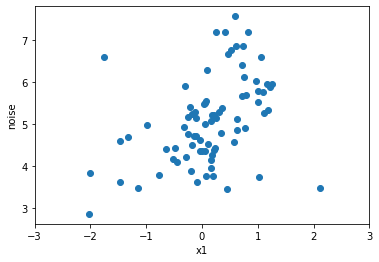

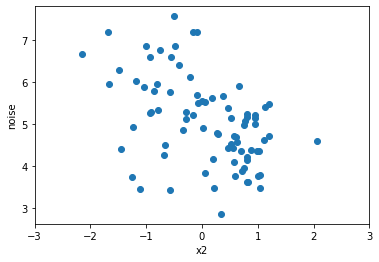

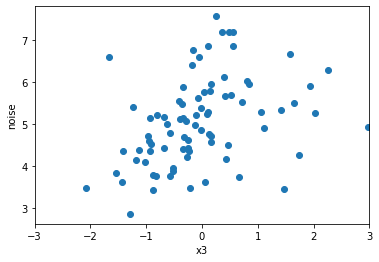

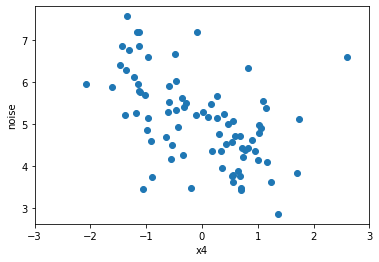

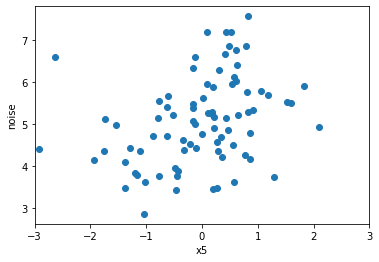

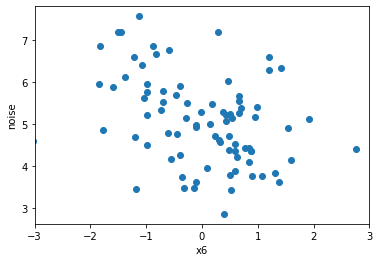

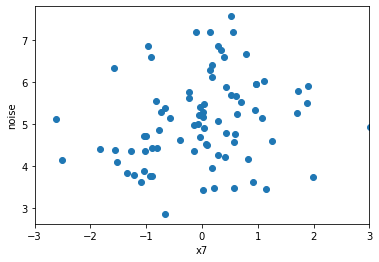

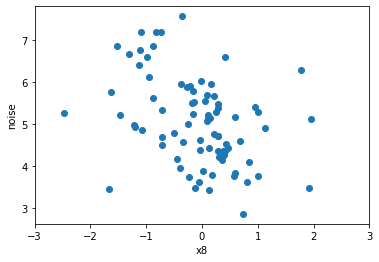

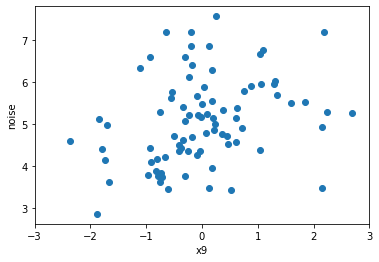

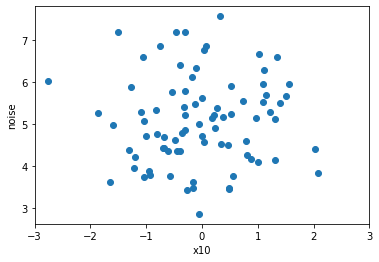

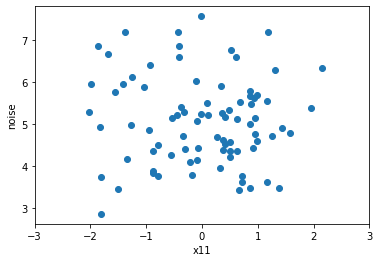

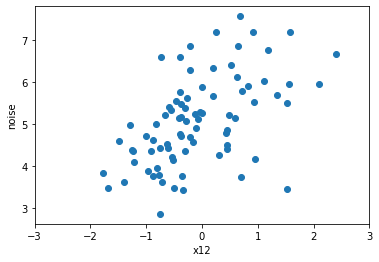

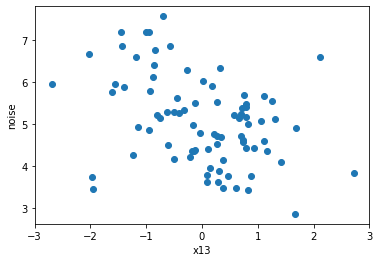

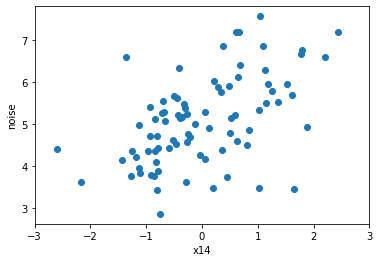

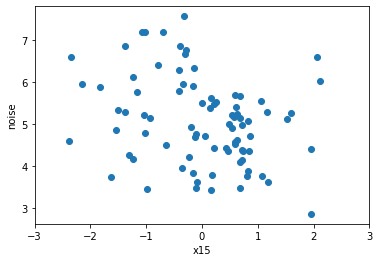

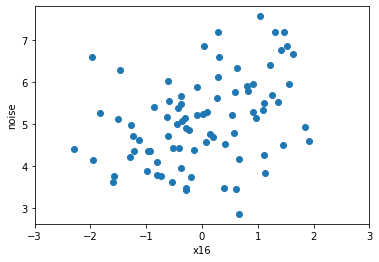

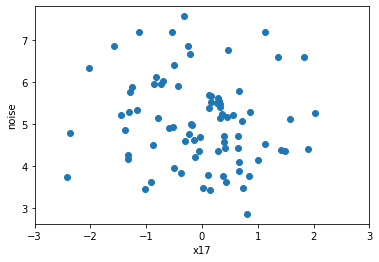

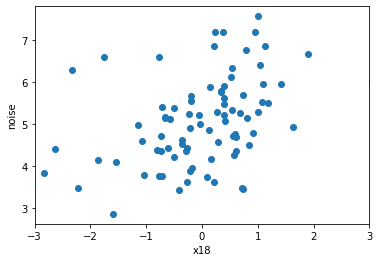

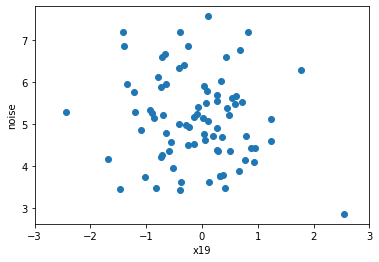

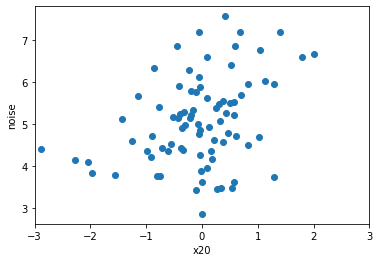

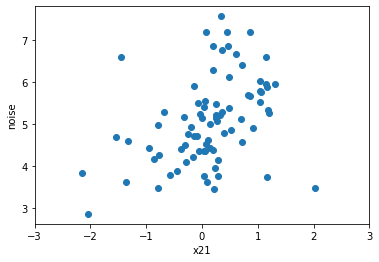

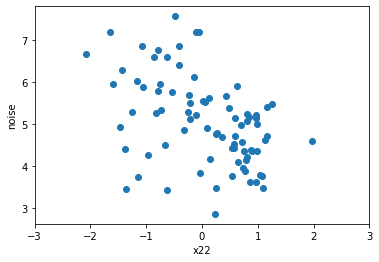

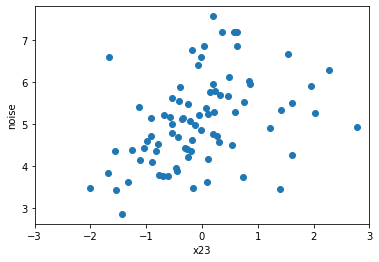

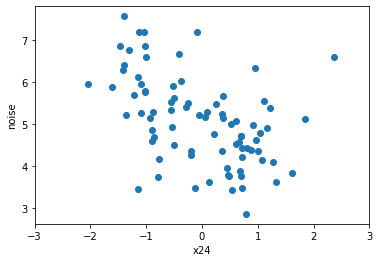

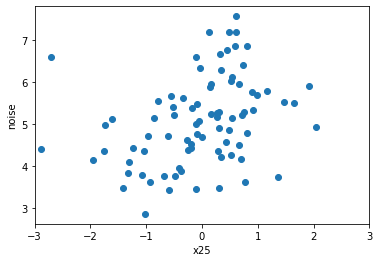

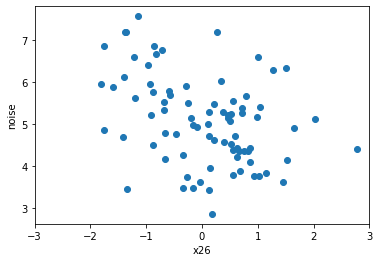

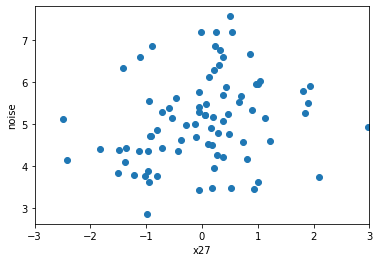

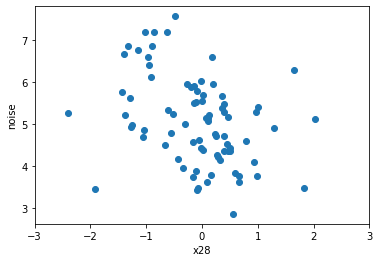

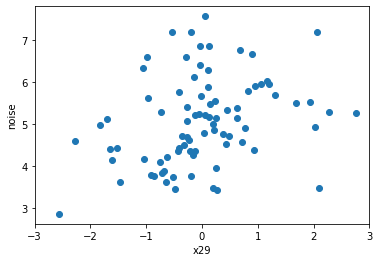

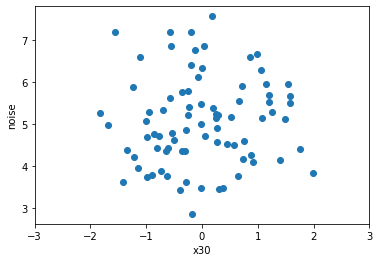

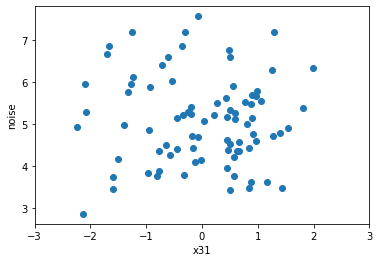

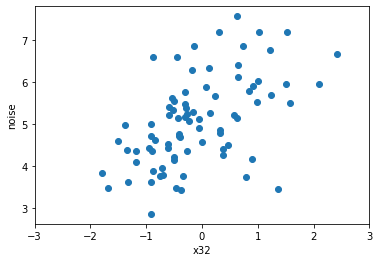

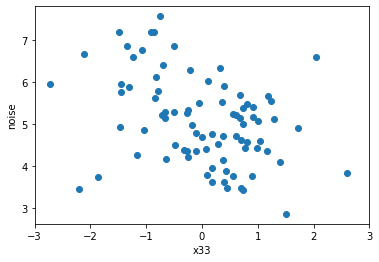

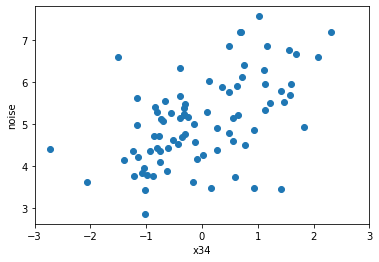

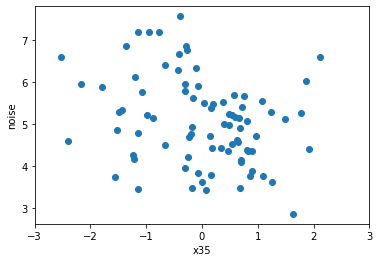

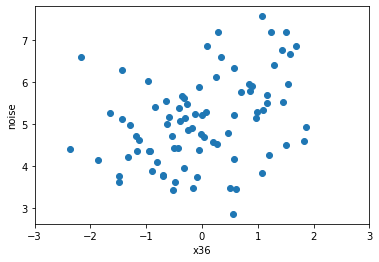

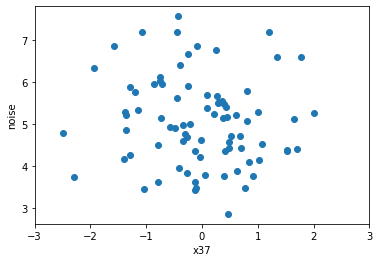

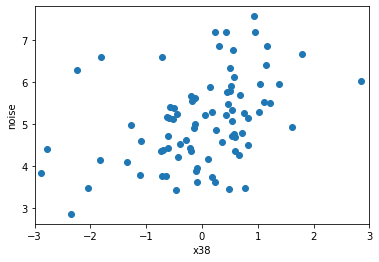

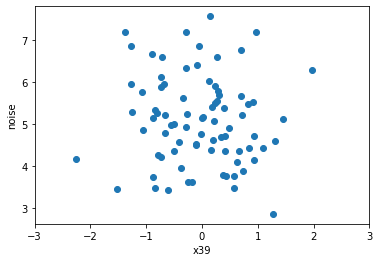

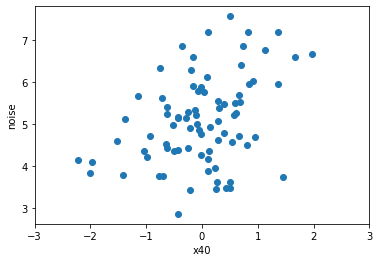

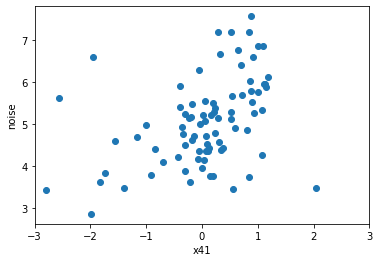

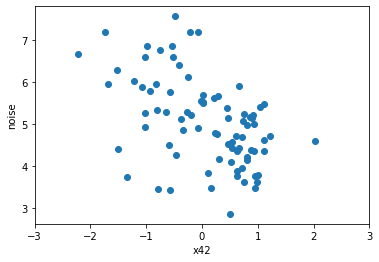

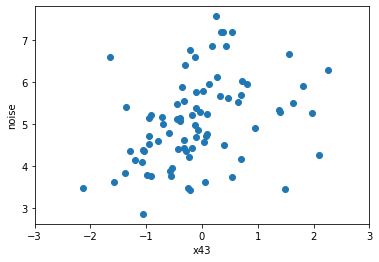

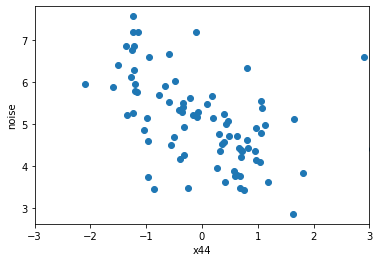

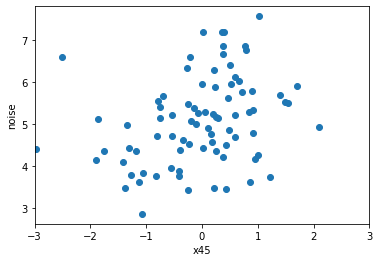

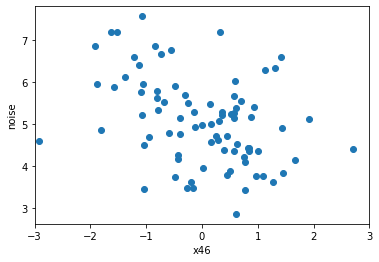

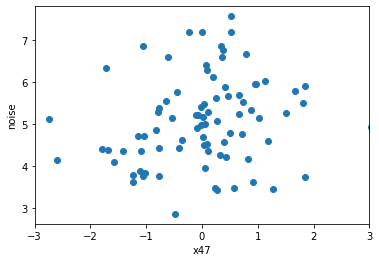

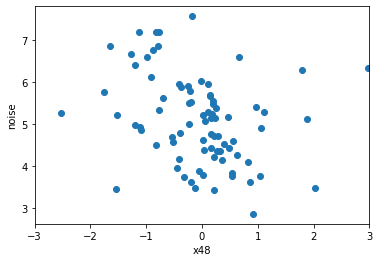

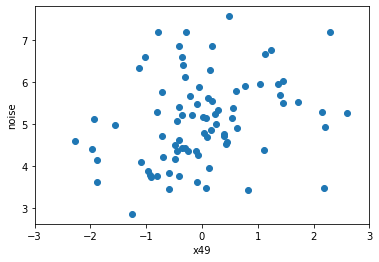

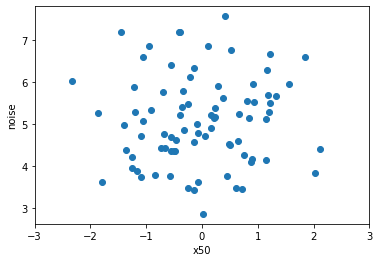

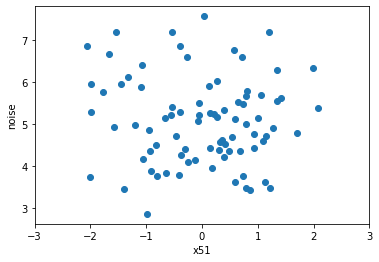

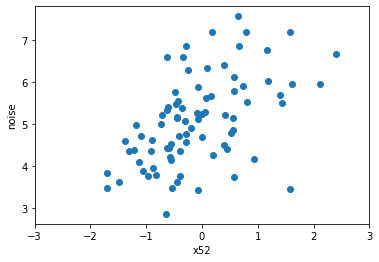

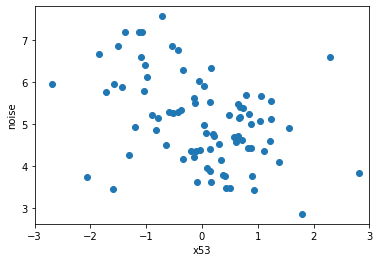

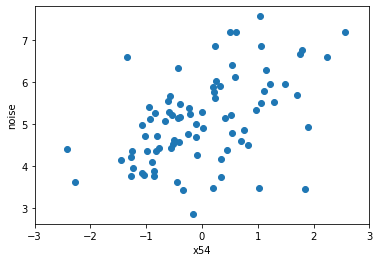

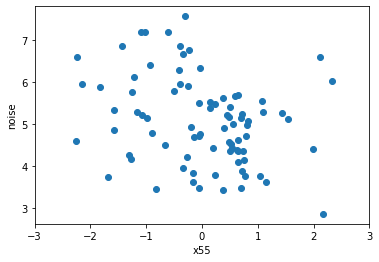

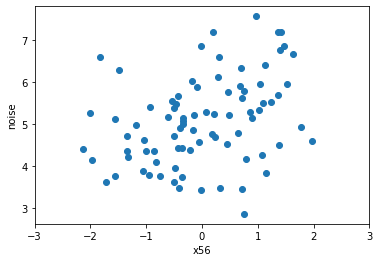

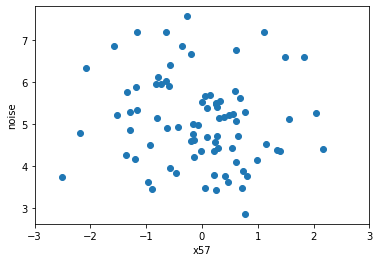

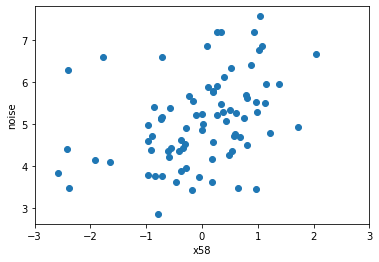

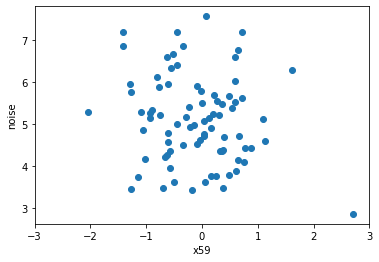

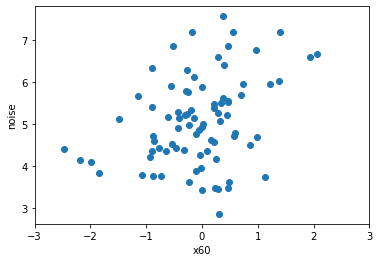

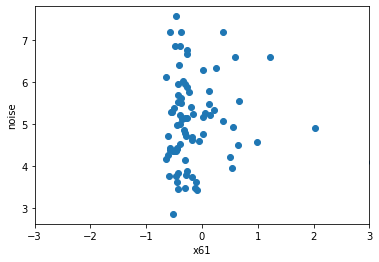

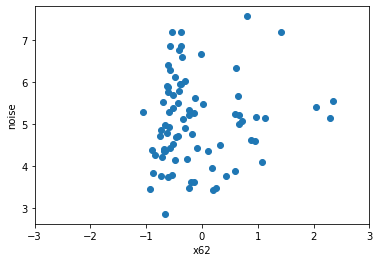

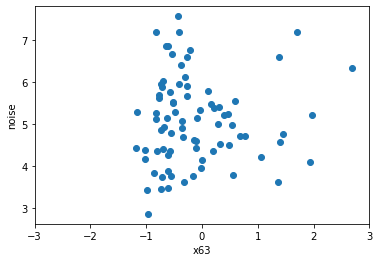

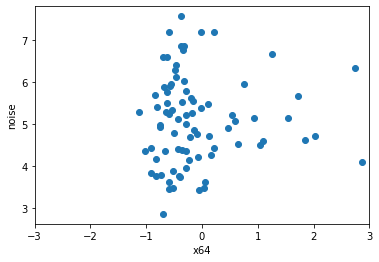

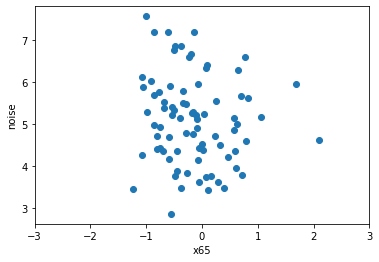

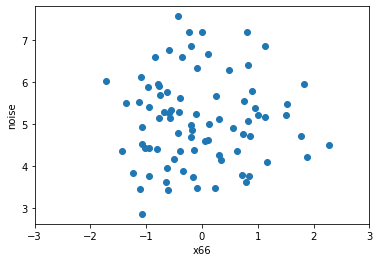

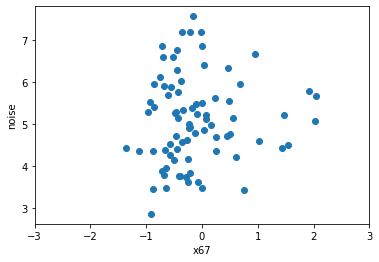

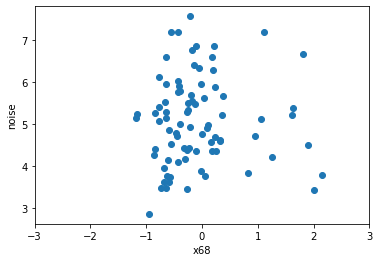

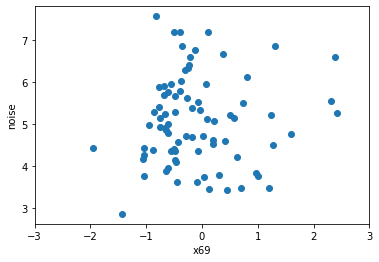

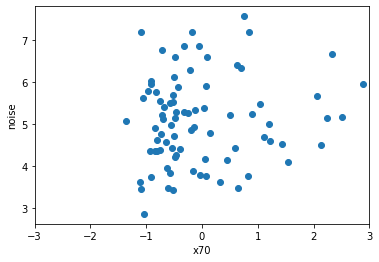

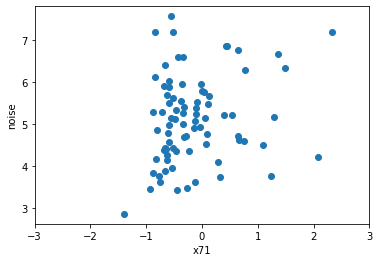

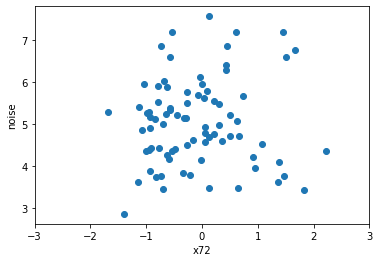

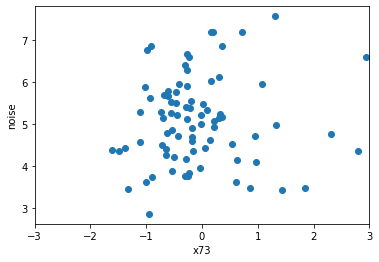

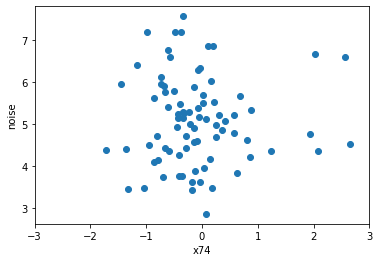

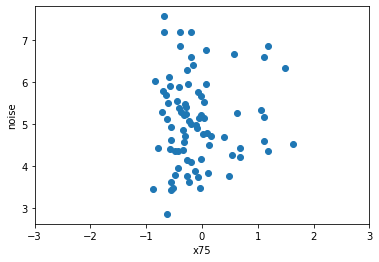

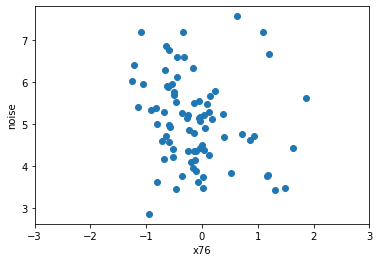

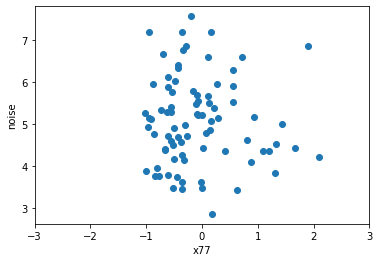

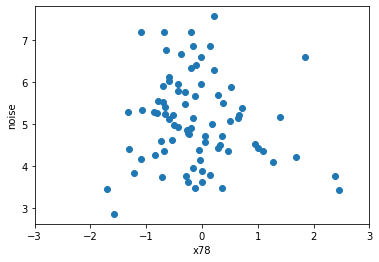

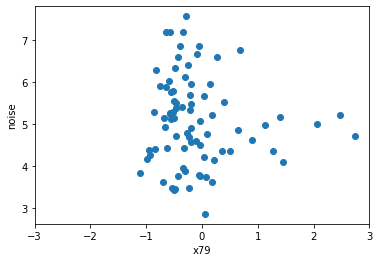

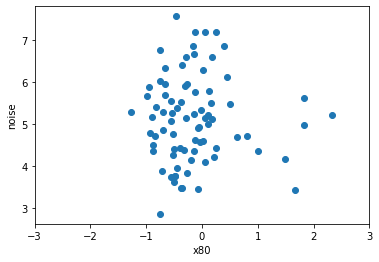

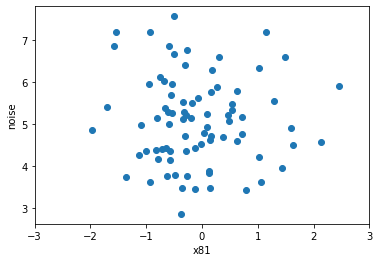

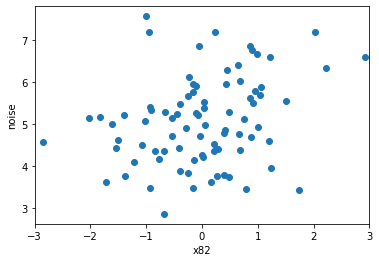

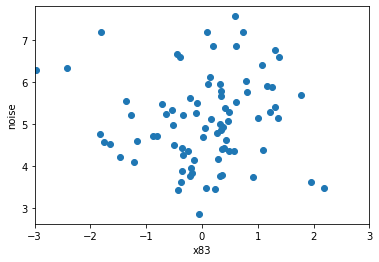

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# 分别绘制每个x和y的散点图
for i in range(len(train_X)):  # 从第2列开始循环，第1列是y
    # plt.scatter(train_y, train_X.iloc[:, i])
    # plt.xlabel('noise')  # 设置x轴标签
    # plt.ylabel(f'x{i}')  # 设置y轴标签
    # plt.show()  # 显示图像
    plt.scatter(train_X.iloc[:, i], train_y)
    plt.xlim(-3, 3)
    plt.ylabel('noise')
    plt.xlabel(f'x{i+1}')
    plt.show()  # 显示图像